# Usando python básico

In [23]:
import numpy as np

In [24]:
## Ativação sigmoide
def sigmoid(soma):
    return 1 / (1 + np.exp(-soma))

In [25]:
## Função sigmoide derivada
def sigmoidDerivada(sig):
    return sig * (1 - sig)

In [27]:
entradas = np.array([[0,0],
                     [0,1],
                     [1,0],
                     [1,1]
                    ])

In [28]:
saidas = np.array([[0],
                   [1],
                   [1],
                   [0]
                  ])

In [29]:
## Pesos entrada
pesos0 = np.array([[-0.424,-0.740,-0.961],
                   [0.358,-0.577,-0.469]
                  ])

## Pesos saída
pesos1 = np.array([[-0.017],
                   [-0.893],
                   [0.148]
                  ])

In [41]:
epocas = 10000
momentum = 1
taxaAprendizagem = 0.5

In [42]:
## Treinar o modelo

for j in range(epocas):
    ## Cálculo da camada de entrada
    camadaEntrada = entradas
    somaSinapse0 = np.dot(camadaEntrada, pesos0)
    camadaOculta = sigmoid(somaSinapse0)

    ## Cálculo da camada de saída
    somaSinapse1 = np.dot(camadaOculta, pesos1)
    camadaSaida = sigmoid(somaSinapse1)

    ## Calcular o erro
    erro = saidas - camadaSaida

    ## Calculando a média absoluta para o erro
    mediaAbsoluta = np.mean(np.abs(erro))

    ## Calculando a derivada da saída
    derivadaSaida = sigmoidDerivada(camadaSaida)
    deltaSaida = erro * derivadaSaida

    ## Calculando o delta da saída
    derivadaOculta = sigmoidDerivada(camadaOculta)
    deltaOculta = np.dot(deltaSaida, pesos1.T) * derivadaOculta

    ## Transpor a camadaOculta
    camadaOcultaTransposta = camadaOculta.T
    pesosNovo1 = np.dot(camadaOcultaTransposta, deltaSaida)

    ## Atualizando os pesos
    pesos1 = (pesos1 * momentum) + (pesosNovo1 * taxaAprendizagem)

    ## Camada de Entrada
    camadaEntradaTransposta = camadaEntrada.T
    pesosNovo0 = np.dot(camadaEntradaTransposta, deltaOculta)
    pesos0 = (pesos0 * momentum) + (pesosNovo0 * taxaAprendizagem)

# Usando TF e Keras

In [58]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [59]:
X = entradas
y = saidas

In [60]:
## Definindo a rede neural com Keras
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(3, activation='sigmoid', name='hidden_layer'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

In [61]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [75]:
## Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              loss='binary_crossentropy',
              metrics=['binary_accuracy']
             )

In [76]:
model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - binary_accuracy: 0.5000 - loss: 0.6344
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - binary_accuracy: 0.5000 - loss: 0.6331
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - binary_accuracy: 0.5000 - loss: 0.6319
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - binary_accuracy: 0.5000 - loss: 0.6306
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - binary_accuracy: 0.5000 - loss: 0.6293
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - binary_accuracy: 0.5000 - loss: 0.6280
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - binary_accuracy: 0.5000 - loss: 0.6266
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - binary_accuracy: 0.5000 - loss: 0.6253
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - binary_accuracy: 0.5000 - loss: 0.6239
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - binary_accuracy: 0.5000 - loss: 0.6225
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - binary_accuracy: 0.5000 - loss: 0.6

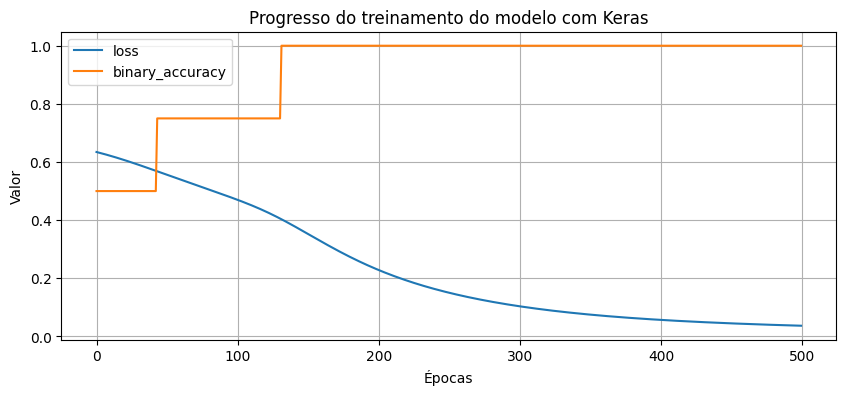

In [77]:
## Visualização do progresso de treinamento
plt.figure(figsize=(10,4))
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['binary_accuracy'], label='binary_accuracy')
plt.title('Progresso do treinamento do modelo com Keras')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
predicoes = model.predict(X)

print(f"{'Entrada':<12}{'Saída':<15}{'Resposta RN':<15}{'Resultado'}")

for entrada, esperado, saida in zip(X, y, predicoes):
    entrada_str = f"{entrada[0]}, {entrada[1]}"

    esperado_val = int(esperado.item())
    saida_val = saida.item()

    saida_bin = 1 if saida_val > 0.5 else 0
    resultado = "✅" if saida_bin == esperado_val else "❌"

    print(f"{entrada_str:<12} -> {esperado_val:<12} -> {saida_bin:<12} {resultado}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Entrada     Saída          Resposta RN    Resultado
0, 0         -> 0            -> 0            ✅
0, 1         -> 1            -> 1            ✅
1, 0         -> 1            -> 1            ✅
1, 1         -> 0            -> 0            ✅


In [80]:
## Visualizar os pesos
model.get_weights()

[array([[ 1.7923348,  6.302159 ,  5.4577956],
        [ 4.377439 ,  5.5662065, -3.565836 ]], dtype=float32),
 array([-4.269101 , -2.1463187,  1.8757176], dtype=float32),
 array([[-7.642507 ],
        [ 8.972522 ],
        [-5.6723895]], dtype=float32),
 array([0.26243687], dtype=float32)]

In [82]:
## Salvando o modelo para uso futuro
caminho_modelo = 'modelo_xor_completo.keras'

model.save(caminho_modelo)

print(f"Modelo salvo em: {caminho_modelo}")

Modelo salvo em: modelo_xor_completo.keras


In [83]:
## Carregando o modelo salvo
modelo_carregado = tf.keras.models.load_model(caminho_modelo)

In [84]:
modelo_carregado.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (64.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [85]:
## Testando com o novo modelo carregado
predicoes = modelo_carregado.predict(X)

print(f"{'Entrada':<12}{'Saída':<15}{'Resposta RN':<15}{'Resultado'}")

for entrada, esperado, saida in zip(X, y, predicoes):
    entrada_str = f"{entrada[0]}, {entrada[1]}"

    esperado_val = int(esperado.item())
    saida_val = saida.item()

    saida_bin = 1 if saida_val > 0.5 else 0
    resultado = "✅" if saida_bin == esperado_val else "❌"

    print(f"{entrada_str:<12} -> {esperado_val:<12} -> {saida_bin:<12} {resultado}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Entrada     Saída          Resposta RN    Resultado
0, 0         -> 0            -> 0            ✅
0, 1         -> 1            -> 1            ✅
1, 0         -> 1            -> 1            ✅
1, 1         -> 0            -> 0            ✅
